In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 MB 6.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0+cu121
    Uninstalling torch-2.3.0+cu121:
      Successfully uninstalled torch-2.3.0+cu121


In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 32.1 MB/s eta 0:00:00


In [ ]:
pip install --upgrade easyocr torchvision torch


In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
IMAGE_PATH = '/content/restaurant-bar-receipt-sample.jpg'


In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

[([[141, 37], [680, 37], [680, 89], [141, 89]],
  'Hotel Restaurant and Bar',
  0.914673435731859),
 ([[262, 78], [546, 78], [546, 126], [262, 126]],
  '1016 6th Ave',
  0.49553560744056674),
 ([[264, 116], [556, 116], [556, 171], [264, 171]],
  'New York NY',
  0.9949922606077198),
 ([[216, 156], [600, 156], [600, 210], [216, 210]],
  'Tel: 650-309-1992',
  0.7521951641655433),
 ([[221, 271], [407, 271], [407, 307], [221, 307]],
  '09/25/2020',
  0.9999937799363497),
 ([[449, 271], [599, 271], [599, 307], [449, 307]],
  '12.54 PM',
  0.9451658491727521),
 ([[311, 311], [505, 311], [505, 347], [311, 347]],
  'TERMINAL 2',
  0.8118425524457545),
 ([[11, 367], [25, 367], [25, 391], [11, 391]], '1', 0.8372502361291936),
 ([[73, 359], [399, 359], [399, 397], [73, 397]],
  'Hendrick Gin & Tonic',
  0.8965266801677237),
 ([[641, 355], [753, 355], [753, 399], [641, 399]],
  'S10.50',
  0.985390232311995),
 ([[11, 425], [25, 425], [25, 453], [11, 453]], '1', 0.9952400480384007),
 ([[69, 419], 

In [ ]:
data = [{'bounding_box': item[0], 'text': item[1], 'confidence': item[2]} for item in result]
df = pd.DataFrame(data)
print(df)


NameError: name 'result' is not defined

**Draw the Image**

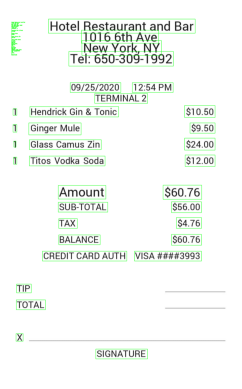

In [ ]:
# Check if the result is populated
if not result:
    raise ValueError("The result list is empty")

# Load the image
img = cv2.imread(IMAGE_PATH)

# Check if the image is loaded successfully
if img is None:
    raise ValueError(f"Could not load image from path: {IMAGE_PATH}")

# Resize the image
scale_percent = 400  # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# Resize image
img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

# Define font and initial spacer
font = cv2.FONT_HERSHEY_SIMPLEX
spacer = 200

# Iterate over each detection in the result
for detection in result:
    if len(detection) < 2 or len(detection[0]) < 4:
        print(f"Invalid detection format: {detection}")
        continue

    try:
        # Extract and convert coordinates to integers
        top_left = tuple(map(int, detection[0][0]))
        bottom_right = tuple(map(int, detection[0][2]))
        text = detection[1]

        # Adjust coordinates according to the resized image
        top_left = (int(top_left[0] * scale_percent / 100), int(top_left[1] * scale_percent / 100))
        bottom_right = (int(bottom_right[0] * scale_percent / 100), int(bottom_right[1] * scale_percent / 100))

        # Draw rectangle and text
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
        img = cv2.putText(img, text, (20, spacer), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

        spacer += 15
    except Exception as e:
        print(f"Error processing detection {detection}: {e}")

# Convert BGR image to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()

MultiLines

Text

In [ ]:
import pandas as pd

# Assuming `result` is a list of tuples (bounding_box, text, confidence)
data = [{'bounding_box': item[0], 'text': item[1], 'confidence': item[2]} for item in result]
df = pd.DataFrame(data)

# Initialize lists for the new columns
product_names = []
items_bought = []
amounts = []

# List to hold all text entries
all_texts = []

# Variable to hold the product name until an amount is found
pending_product_name = None
# Variable to identify if the current row is a summary row
is_summary_row = False


for index, row in df.iterrows():

    text = row['text']
    all_texts.append(text)



    if pending_product_name is not None:
        # If there's a pending product name, check if this is an amount
        if (text.startswith('S') or text.startswith('$')) and len(text) > 1 and text[1:].replace('.', '', 1).isdigit():
            # This is an amount
            product_names.append(pending_product_name)
            amounts.append(text)

            # Get the text before the pending product name as the quantity/item bought
            previous_text = all_texts[-3] if len(all_texts) >= 3 else ''
            # Ensure the previous text doesn't start with 'S' or '$'
            if previous_text.startswith('S') or previous_text.startswith('$'):
                items_bought.append('')
            else:
                items_bought.append(previous_text)
            pending_product_name = None  # Reset pending product name
        else:
            # If not an amount, reset pending product name
            pending_product_name = None

    # Check if the current text is a potential product name
    if pending_product_name is None:
        if text:  # Include all text entries
            pending_product_name = text

# Create the final DataFrame
final_df = pd.DataFrame({
    'Product Name': product_names,
    'Item Bought': items_bought,
    'Amount': amounts
})

# Filter out rows where 'Amount' is empty
final_df = final_df[final_df['Amount'] != '']

print(final_df)


           Product Name Item Bought  Amount
0  Hendrick Gin & Tonic           1  S10.50
1           Ginger Mule           1   S9.50
2       Glass Camus Zin           1  S24.00
3      Titos Vodka Soda           1  S12.00
4                Amount              S60.76
5             SUB-TOTAL              S56.00
6                   TAX               S4.76
7               BALANCE              S60.76


In [ ]:
IMAGE_PATH = '/content/8bcef96da97b01fa0936e76ece3f690b.jpg'

reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)

data = [{'bounding_box': item[0], 'text': item[1], 'confidence': item[2]} for item in result]
df = pd.DataFrame(data)
print(df)


                                        bounding_box                text  \
0       [[169, 47], [374, 47], [374, 77], [169, 77]]      RestaurantName   
1       [[18, 91], [128, 91], [128, 118], [18, 118]]           Address 1   
2     [[18, 133], [130, 133], [130, 162], [18, 162]]           Address 2   
3   [[303, 221], [531, 221], [531, 257], [303, 257]]  3/15/09 6.06.44 PM   
4     [[18, 310], [134, 310], [134, 338], [18, 338]]          Table: 201   
5   [[192, 310], [320, 310], [320, 340], [192, 340]]          Chk: #1111   
6   [[396, 310], [486, 310], [486, 338], [396, 338]]            Guest: 2   
7   [[142, 484], [332, 484], [332, 514], [142, 514]]       5 BLOODY MARY   
8   [[348, 484], [430, 484], [430, 512], [348, 512]]             $ 40.75   
9   [[142, 528], [332, 528], [332, 558], [142, 558]]      1 FRESH OYSTER   
10  [[346, 528], [432, 528], [432, 556], [346, 556]]             $ 12.50   
11  [[206, 572], [332, 572], [332, 600], [206, 600]]            SUBTOTAL   
12  [[346, 5

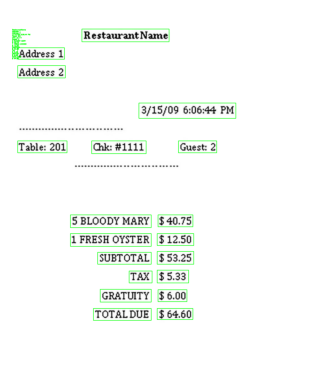

In [ ]:
# Check if the result is populated
if not result:
    raise ValueError("The result list is empty")

# Load the image
img = cv2.imread(IMAGE_PATH)

# Check if the image is loaded successfully
if img is None:
    raise ValueError(f"Could not load image from path: {IMAGE_PATH}")

# Resize the image
scale_percent = 400  # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# Resize image
img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

# Define font and initial spacer
font = cv2.FONT_HERSHEY_SIMPLEX
spacer = 200

# Iterate over each detection in the result
for detection in result:
    if len(detection) < 2 or len(detection[0]) < 4:
        print(f"Invalid detection format: {detection}")
        continue

    try:
        # Extract and convert coordinates to integers
        top_left = tuple(map(int, detection[0][0]))
        bottom_right = tuple(map(int, detection[0][2]))
        text = detection[1]

        # Adjust coordinates according to the resized image
        top_left = (int(top_left[0] * scale_percent / 100), int(top_left[1] * scale_percent / 100))
        bottom_right = (int(bottom_right[0] * scale_percent / 100), int(bottom_right[1] * scale_percent / 100))

        # Draw rectangle and text
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)
        img = cv2.putText(img, text, (20, spacer), font, 0.5, (0, 255, 0), 2, cv2.LINE_AA)

        spacer += 15
    except Exception as e:
        print(f"Error processing detection {detection}: {e}")

# Convert BGR image to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(data, columns=['bounding_box', 'text', 'confidence'])

# Initialize lists for the new columns
product_names = []
items_bought = []
amounts = []

# Variable to hold the product name until an amount is found
pending_product_name = None

# Variable to identify if the current row is a summary row
is_summary_row = False

for index, row in df.iterrows():
    text = row['text'].strip()

    # Check for summary rows and skip them
    if text in ['SUBTOTAL', 'TAX', 'GRATUTY', 'TOTAL DUE']:
        is_summary_row = True
        continue
    elif text.startswith('$') and is_summary_row:
        is_summary_row = False
        continue

    # Skip non-item rows
    if any(keyword in text for keyword in ['Table:', 'Chk:', 'Guest:', 'RestaurantName', 'Address', 'PM']):
        continue

    # Split the text based on currency symbols ('$')
    text_parts = text.split('$')
    for part in text_parts:
        part = part.strip()
        if part:
            if part.replace('.', '', 1).isdigit():  # Check if the part is a valid amount
                amounts.append('$' + part)  # Append amount with '$'
                # If there's a pending product name, add it to the list
                if pending_product_name:
                    # Extract quantity and product name
                    words = pending_product_name.split(' ')
                    if len(words) > 1 and words[0].isdigit():  # Check if the first part is a number
                        items_bought.append(words[0])  # If yes, it's quantity
                        product_names.append(' '.join(words[1:]))  # The rest is the product name
                    else:
                        items_bought.append('1')  # If no quantity specified, assume one
                        product_names.append(pending_product_name)  # No quantity, so entire text is product name
                    pending_product_name = None
            else:
                # Check if the part contains alphabets or not
                if any(char.isalpha() for char in part):
                    # If it contains alphabets, it's a potential product name
                    if pending_product_name:
                        # If there's already a pending product name, append it to the list
                        product_names.append(pending_product_name)
                    pending_product_name = part  # Set the new pending product name
                else:
                    # If it doesn't contain alphabets, it's part of the product name or irrelevant text
                    if pending_product_name:
                        # If there's a pending product name, append it with the current part
                        pending_product_name += ' ' + part

# Create the final DataFrame
final_df = pd.DataFrame({
    'Product Name': product_names,
    'Item Bought': items_bought,
    'Amount': amounts
})

print(final_df)

   Product Name Item Bought  Amount
0   BLOODY MARY           5  $40.75
1  FRESH OYSTER           1  $12.50
